<a href="https://colab.research.google.com/github/OzgeAysu/nedenselCalisma/blob/main/nedensel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
from causallearn.graph.Dag import Dag
from causallearn.graph.Edge import Edge
from causallearn.graph.GeneralGraph import GeneralGraph
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.search.ScoreBased.GES import ges
from causallearn.search.PermutationBased.GRaSP import grasp
from causallearn.utils.GraphUtils import GraphUtils

In [ ]:
data = pd.read_csv('/diabetes.csv',encoding='unicode_escape')
print("Preview of Data:")
print(data.head(3))
print("Preview of Data:")
print(data.describe())

Preview of Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
Preview of Data:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000

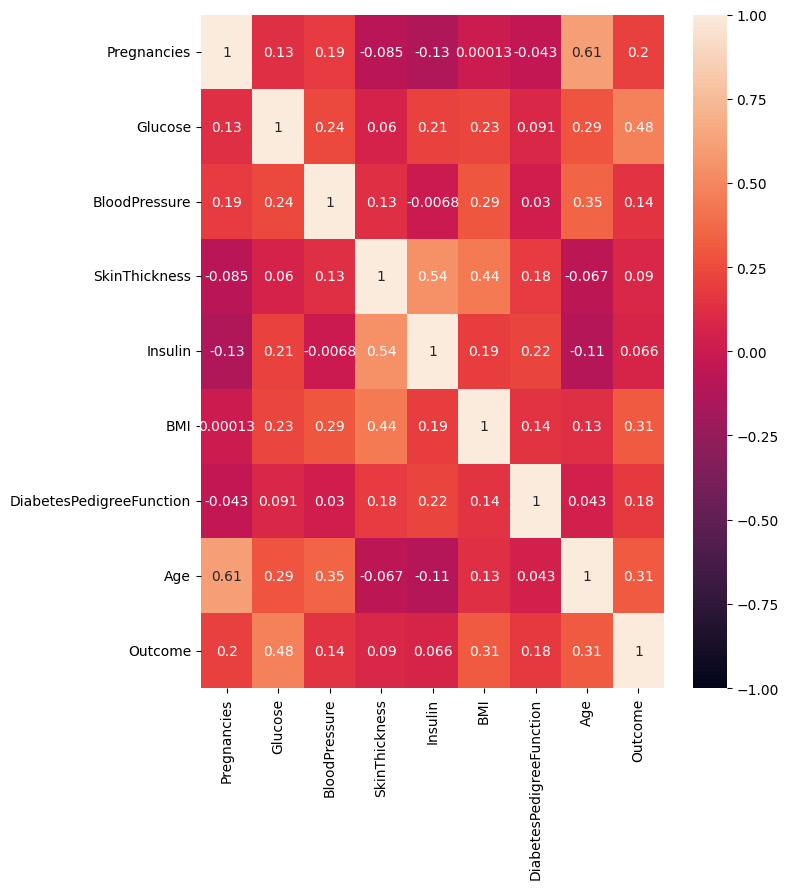

In [ ]:
def display_spearman_correlation(df):
    correlation_matrix = df.corr(method="spearman")
    plt.figure(figsize=(8,9))
    sns.heatmap(correlation_matrix,vmin=-1,vmax=1,annot=True)
    plt.title("")
    plt.show()
spearman_correlation_matrix = display_spearman_correlation(data)

<function matplotlib.pyplot.show(close=None, block=None)>

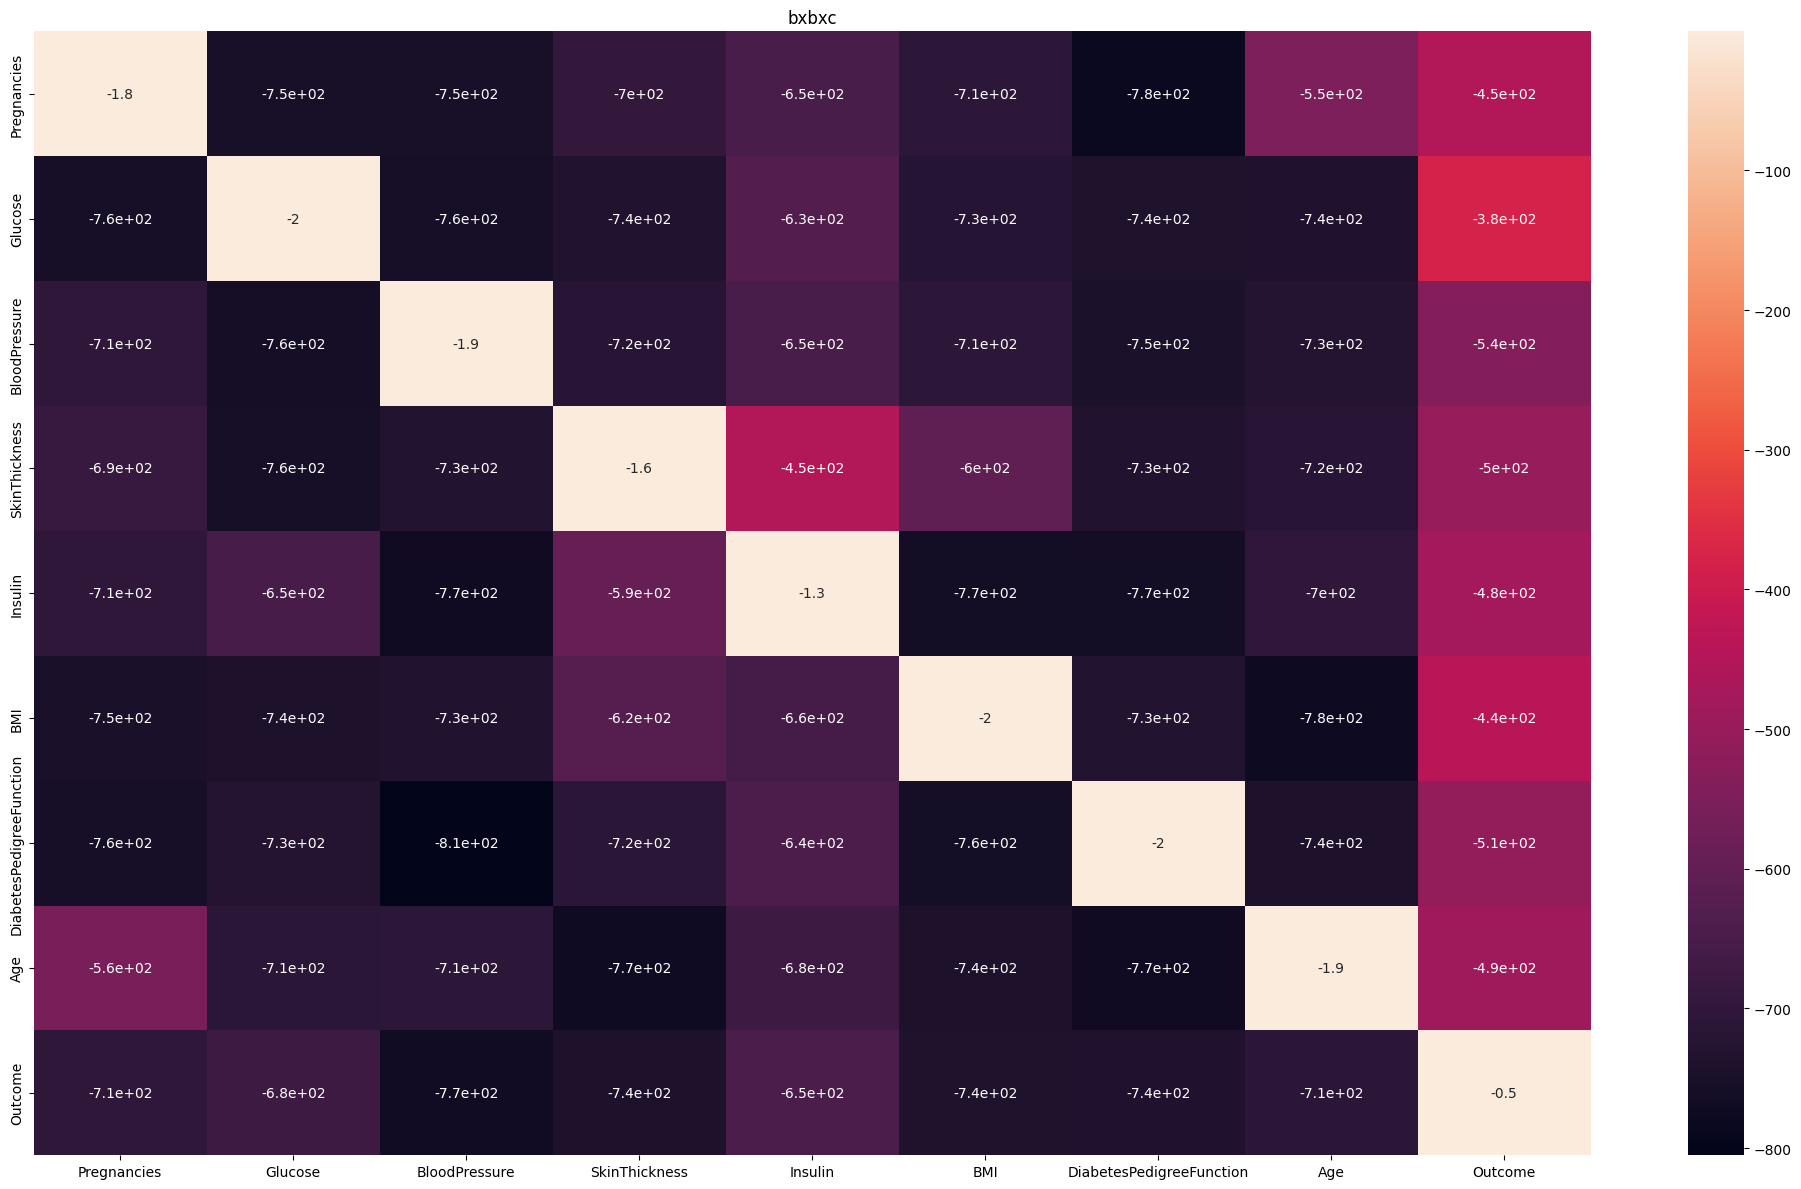

In [ ]:
def calculate_chatterjee_correlation(data):
  correlation_matrix = np.zeros((data.shape[1],data.shape[1]))
  for i in range(data.shape[1]):
    for j in range(data.shape[1]):
      df_temp = pd.DataFrame(zip(data.iloc[:,i], data.iloc[:,j]), columns=["x","y"])
      df_temp["yranks"] = df_temp["y"].rank()
      df_temp=df_temp.sort_values("x")
      rank_series = df_temp["yranks"].reset_index(drop=True)
      diff = [abs(rank_series[k+1]-rank_series[k]) for k in range(len(rank_series)-1)]
      correlation_matrix[i,j] =1-3 * (sum(diff)/(df_temp.shape[0]))
  return correlation_matrix
chatterjee_correlation_matrix = calculate_chatterjee_correlation(data)
sns.heatmap(pd.DataFrame(chatterjee_correlation_matrix, columns = data.columns, index= data.columns).round(3), annot= True)
plt.title("bxbxc")
plt.show

  0%|          | 0/9 [00:00<?, ?it/s]

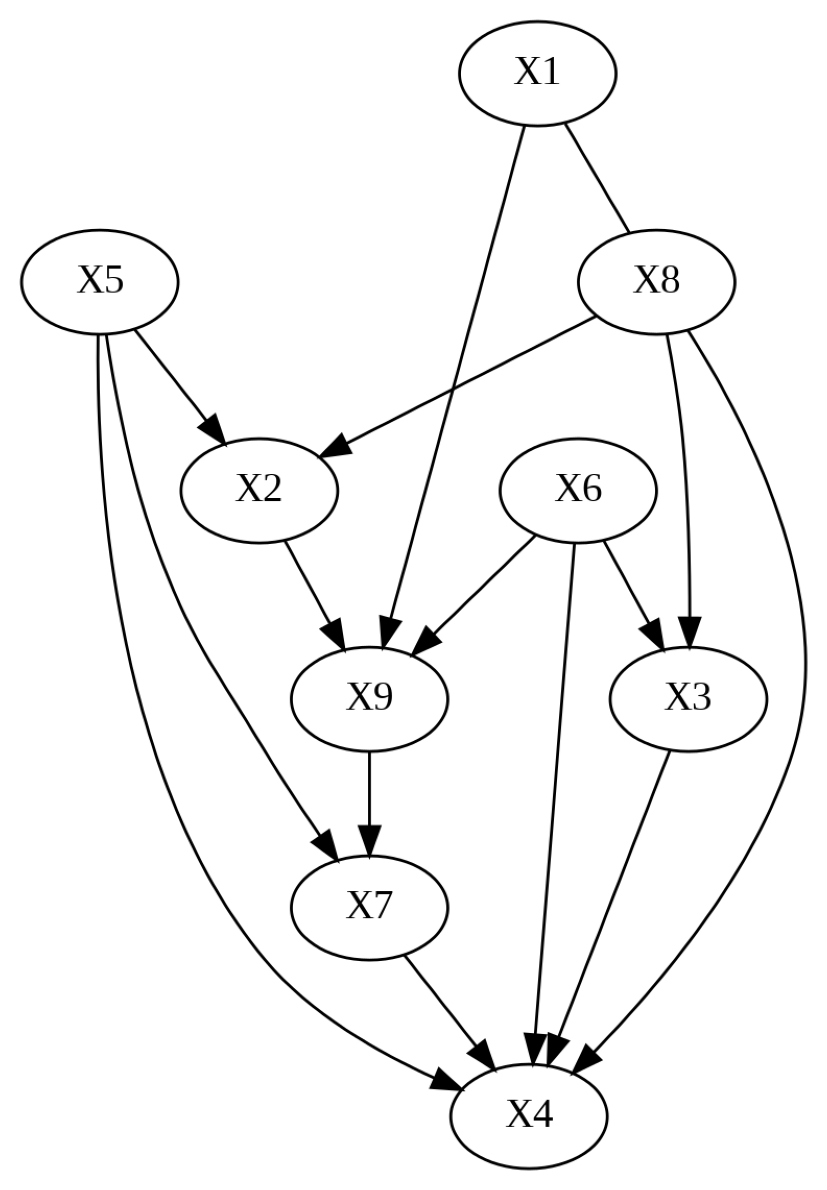

In [ ]:
pc_graf = pc(data.to_numpy(), verbos =True)
pc_graf.draw_pydot_graph()

In [ ]:
#FCI
fci_graph,_= fci(data.to_numpy())
pyd = GraphUtils.to_pydot(fci_graph, labels=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"])
pyd.write_png('FCI(deneme1).png')

  0%|          | 0/9 [00:00<?, ?it/s]

X8 --> X1
X1 --> X9
X2 --> X9
X8 --> X3
X6 --> X4
X7 --> X4


In [ ]:
#GES
ges_record = ges(data)
ges_dag = ges_record['G']
pyd = GraphUtils.to_pydot(ges_dag, labels=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"])
pyd.write_png('GES1(deneme1).png')

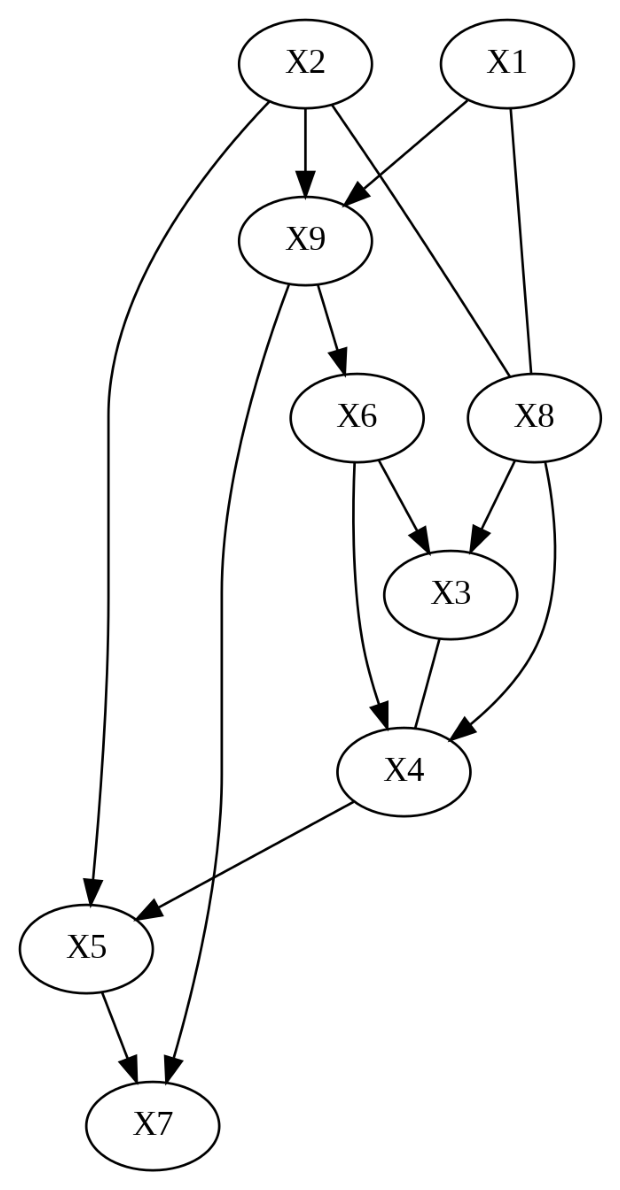

In [ ]:
Record = ges(data)

# or customized parameters
#Record = ges(data, 4, None, None)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')

GRaSP edge count: 13    
GRaSP completed in: 0.35s 


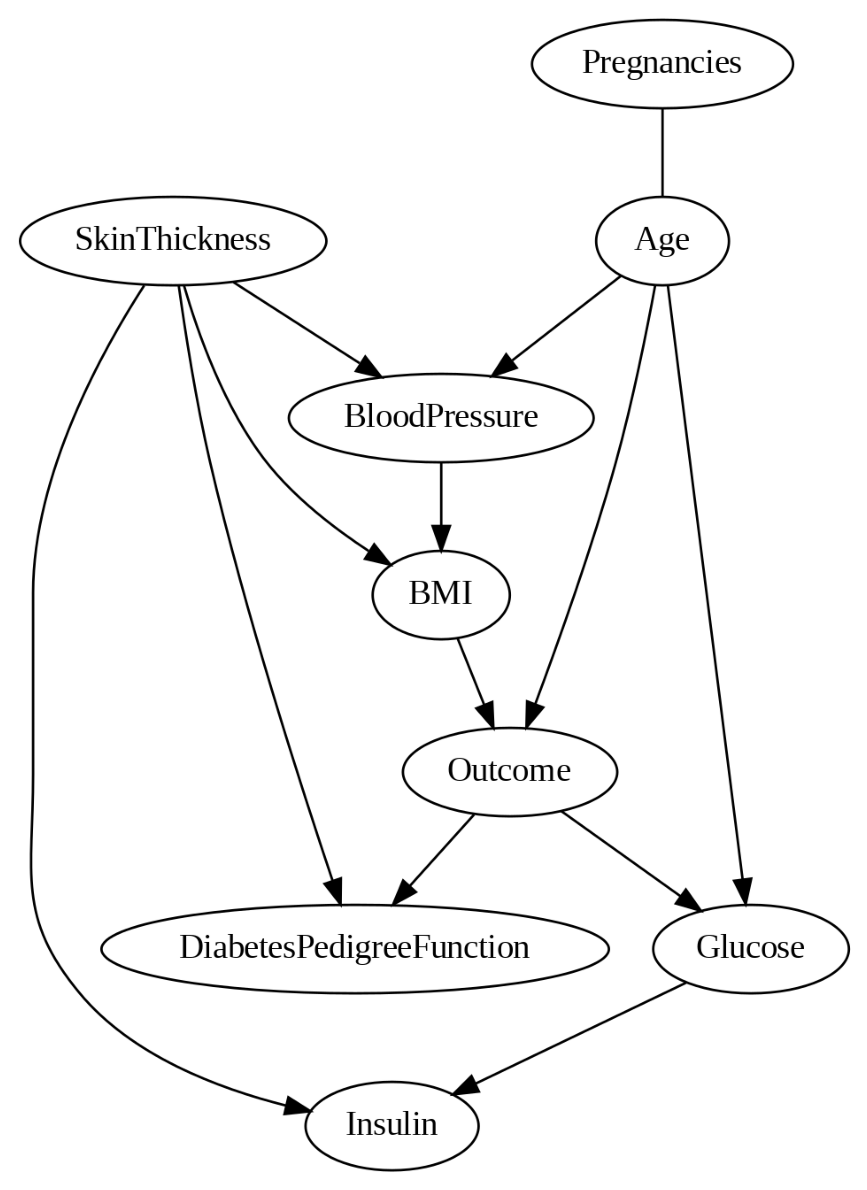

In [ ]:
#GRaSP
# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io
grasp_graph = grasp(data)
pyd = GraphUtils.to_pydot(grasp_graph, labels =["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()
pyd.write_png('GRaSP(deneme1).png')